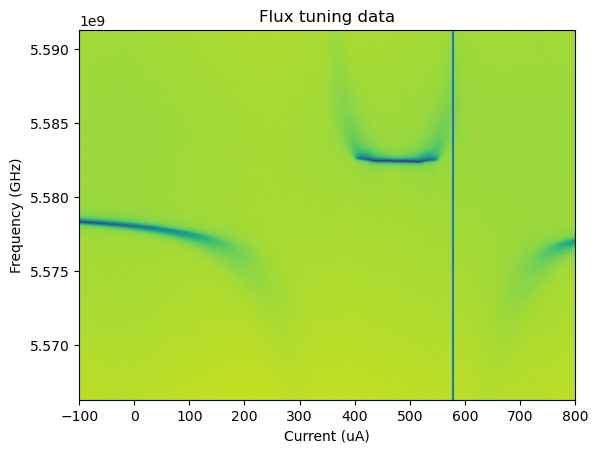

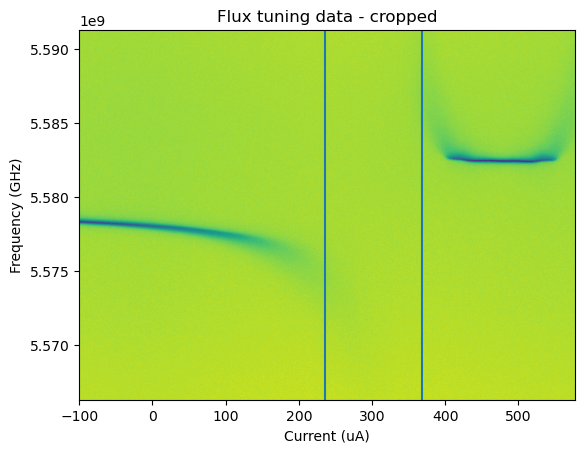

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


811
fit error = [3.62273443e-06 2.64019546e+00 1.01613655e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
812
fit error = [3.42136698e-06 2.54496459e+00 8.17716010e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
813
814
815
816
817
fit error = [-2.42620268e+17  3.57472921e+08  4.62383641e+20]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
94

In [83]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import cmath
from scipy.optimize import curve_fit
import math

#sys.path.append("..\lflPython\fitTools")
from fitTools.Resonator import Resonator
datapath = 'G:\\Shared drives\\LFL\\Labber\\Data\\2023\\04\\Data_0406\\'
f_name = 'diss09_5578_fine_flux_sweep_2.hdf5'

f = h5py.File(datapath + f_name,'r')

# Use this structure to search thru the hdf5 file - 'Group' data types contain 'Dataset' types, 
# which is where relevant parameters are stored
# for key in f.keys():
#     print(key)
#     print(type(f[key]))

s21 = f['Traces']['Agilent Network Analyzer E5071B - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer E5071B - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer E5071B - S21_t0dt'][0][()]

# Need to find where the current step parameters are stored if the Keithely is different?
i_start = f['Step config']['Keithley Victoria - Source current']['Step items'][0][3]*10**6 #convert to uA
i_stop = f['Step config']['Keithley Victoria - Source current']['Step items'][0][4]*10**6
i_step = f['Step config']['Keithley Victoria - Source current']['Step items'][0][8]
currents = np.linspace(i_start, i_stop, i_step)
# currents = np.linspace(-100,200,501) If cannot find, create current array manually

s21_complex = s21[:,0,:]+1j*s21[:,1,:] #Combine to complex array
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps) #Create frequency array
plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs[0], freqs[-1]))
plt.title('Flux tuning data')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (GHz)') 
plt.axvline(currents[1130])
plt.show()

#If necessary, flux tuning data must be cropped such that it contains exactly one discontinuity
# ie one lower branch, one upper branch only
def preprocess(start,stop,currents,s21_complex):
    s21_cut = s21_complex[:,start:stop]
    c_cut = currents[start:stop]
    return c_cut, s21_cut

currents, s21_complex = preprocess(0,1130,currents,s21_complex)
plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs[0], freqs[-1]))
plt.title('Flux tuning data - cropped')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (GHz)')
plt.axvline(currents[560])
plt.axvline(currents[780])
plt.show()
#Iterate over the currents to extract the resonator frequency at each step
# 3 search modes, in order of increasing fidelty: 
#     min - obtains the freq which corresponds to the minimum magnitude response
#     lorentzian - fits the current slice to a lorentzian
#     circlefit - uses the circlefit function in IQ-plane
#
# min and lorentzian search_modes both guarantee continuity over the desired frequency range
# *** need to have sufficient # of points fitted at the fall-off of the curves in order to produce
# an accurate avoided crossing fit ***

#Helper function for fitting to a Lorentzian
def lorentzian( x, f0, a, gam ):
    return  a * gam**2 / ( gam**2 + ( x - f0 )**2)

def find_res(currents,s21_complex,freqs,search_mode):
    numsteps = np.size(currents);
    s21_resfit = np.zeros(numsteps);
    #Define a start index where the lower curve ends and a stop index where the upper curve starts
    # this can be chosen by eye using the imshow colorplot above
    start = 560
    stop = 780
    #Fill the resfit array
    for i in range(numsteps):
        print(i)
        if search_mode=="min":
            if i>start and i<stop:
                s21_resfit[i] = 'nan'
            else:
                minpos = np.argmin(abs(s21_complex[:,i]))
                s21_resfit[i] = freqs[minpos]
        elif search_mode=="lorentzian":
            if i>start and i<stop:
                s21_resfit[i] = 'nan'
            else:
                minguess = freqs[np.argmin(abs(s21_complex[:,i]))]
                popt, pcov = curve_fit(lorentzian, freqs, s21_complex[:,i],p0=[minguess,1,100],maxfev=5000)
                #Janky artificial cutoff to ensure that the lorentzian fit generates reasonable values
                #For some reason I don't understand yet, it seems to arbitrarily fit wacky values that jump out of range
                if popt[0] <= freqs[-1]:
                    s21_resfit[i] = popt[0]
                else:
                    s21_resfit[i] = s21_resfit[i-1]
        elif search_mode=="circlefit":
            res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[:,i])
            if i<start:
                res.autofit() # use fcrop input argument fcrop(start_freq,stop_freq) as necessary
                s21_resfit[i] = res.f0
            elif i>start and i<stop:
                s21_resfit[i] = 'nan'
            else:
                res.autofit()
                s21_resfit[i] = res.f0
                
    return s21_resfit

minfit = find_res(currents,s21_complex,freqs,search_mode="min")
lorentzfit = find_res(currents,s21_complex,freqs,search_mode="lorentzian")
circlefit = find_res(currents,s21_complex,freqs,search_mode="circlefit")

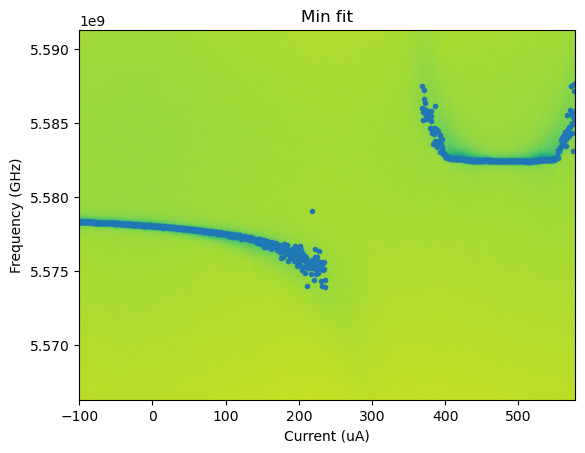

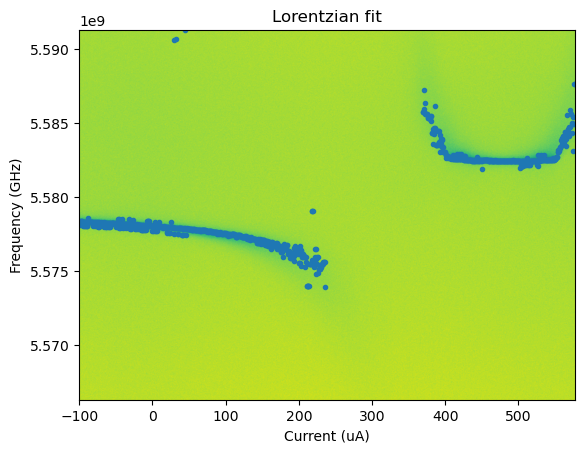

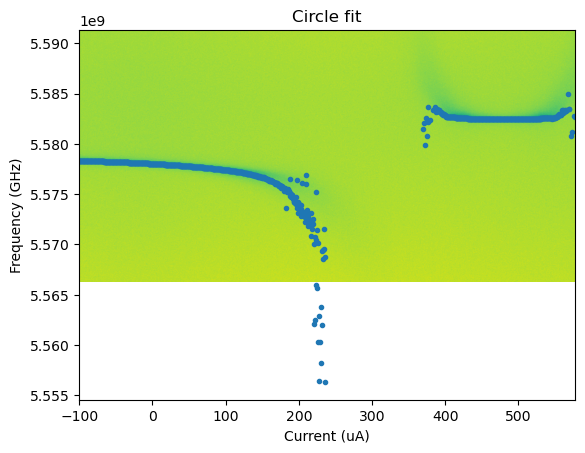

In [112]:
plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs[0], freqs[-1]))
plt.title('Min fit')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (GHz)') 
plt.scatter(currents,minfit,marker='.')
plt.show()

plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs[0], freqs[-1]))
plt.title('Lorentzian fit')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (GHz)') 
plt.scatter(currents,lorentzfit,marker='.')
plt.show()

plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs[0], freqs[-1]))
plt.title('Circle fit')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (GHz)') 
plt.scatter(currents,circlefit,marker='.')
plt.show()


(909,)


C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Wq_max = 8.95480571539398 GHz
Wc = 5.5796623925801 GHz
g = 0.07637492163407791 GHz
phi_offset = -0.4178115365718929
d (junction asymmetry) = 0.005
R^2 of fit =  0.914246747883255


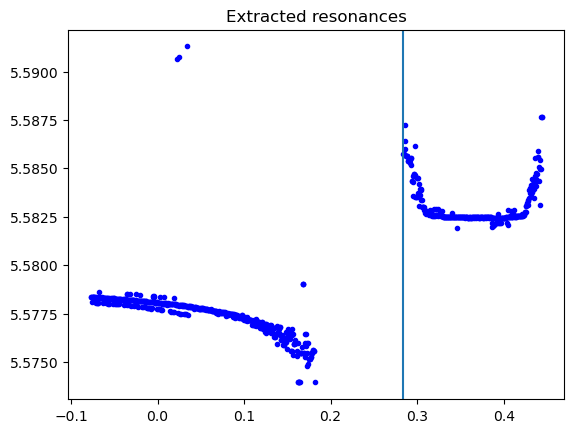

In [124]:
#Fitting function

#Estimate the amount corresponding to 1 flux quantum in units of uA (scaling constant)
flux_quantum = 1300
x = currents/flux_quantum
y = lorentzfit/1e9 #scale to GHz
mask = np.isnan(y)
fitx = x[~mask]
fity=y[~mask]
plt.scatter(fitx,fity,marker='.',c='blue')
print(np.shape(fitx))
#Find the first 'True' index in order to determine where the upper curve starts in the masked array
#this method assumes that the fitted array is continuous except at the avoided crossing ONLY
# the avoided_crossing() function needs this set properly in order to fit a meaningful solution!!!
maskpoint = np.where(np.array(mask)==True)[0][0]
plt.axvline(fitx[maskpoint])
plt.title('Extracted resonances')

#Form for avoided crossings which fits the upper and lower curves simultaneously
#see documentation for derivation
def avoided_crossing(x, wq_max, wc, g,phi_offset,d):
    y = np.zeros(len(x))
    for i in range(len(x)):
        flux_dep = np.emath.power(abs(np.cos(np.pi*x[i]-phi_offset)),2) 
        + d**2*np.emath.power(abs(np.sin(np.pi*x[i]-phi_offset)),2)
        wq = wq_max*np.emath.power(flux_dep, 1/4)
        #maskpoint needs to be defined with global scope, specific for each dataset
        if i < maskpoint: #fit to lower curve
            y[i] = 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))
        else: #fit to upper curve
            y[i] = 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))
    return y

popt, pcov = curve_fit(avoided_crossing,fitx,fity,p0=[10,5.58,.09,-.5,.005])
#get R^2 - fit metric
residuals = fity-avoided_crossing(fitx,*popt)
ss_res = np.sum(residuals**2) #residual sum of squares
ss_tot = np.sum((fity - np.mean(fity))**2) #total sum of squares
r_squared = 1 - (ss_res/ss_tot)
                                                                                                 
print("Wq_max = "+str(popt[0])+" GHz")
print("Wc = "+str(popt[1])+" GHz")
print("g = "+str(popt[2])+" GHz")
print("phi_offset = "+str(popt[3]))
print("d (junction asymmetry) = "+str(popt[4]))
print("R^2 of fit = ",r_squared)



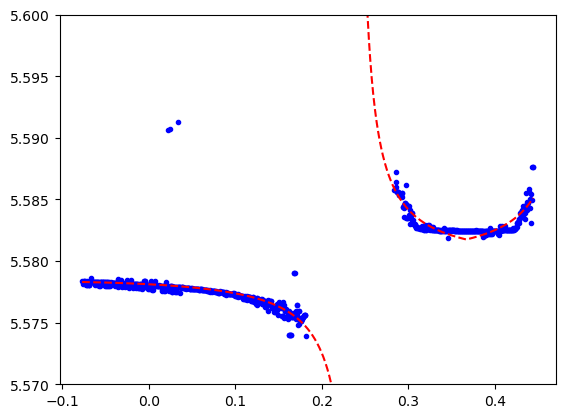

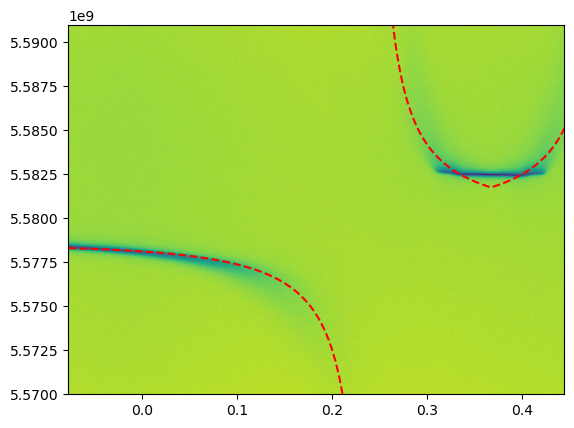

[5.76927678 8.56100677]
[5.5771494]


In [144]:
#Define helper functions which are useful to plot continuous theoretical curves, one for
# the upper curve and one for the lower curve
def avoided_crossing_lower(x, wq_max, wc, g,phi_offset,d):
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) 
    + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))

def avoided_crossing_upper(x, wq_max, wc, g, phi_offset,d):
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) 
    + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))

#Plot the fitted resonances with the avoided crossing curve and the color plot with the curve
plt.scatter(fitx,fity,marker='.',c='blue')
plt.plot(x,avoided_crossing_lower(x,*popt),'r--')
plt.plot(x,avoided_crossing_upper(x,*popt),'r--')
plt.ylim([5.57,5.60])
plt.figure()
plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(x[0], x[-1], freqs[0], freqs[-1]))
plt.plot(x,avoided_crossing_lower(x,*popt)*1e9,'r--')
plt.plot(x,avoided_crossing_upper(x,*popt)*1e9,'r--')
plt.ylim([5.57e9,5.591e9])
plt.show()

### Extra helper functions

#given an array of bias currents, return the dissipator frequency at each current
def get_diss_freq(current,popt):
    scaled_current = [x/flux_quantum for x in current]
    wq_ans = np.zeros(len(scaled_current))
    wq_max = popt[0]
    phi_offset = popt[3]
    d = popt[4]
    for i in range(len(scaled_current)):
        flux_dep = np.emath.power(abs(np.cos(np.pi*scaled_current[i]-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*scaled_current[i]-phi_offset)),2)
        wq_ans[i] = wq_max*np.emath.power(flux_dep, 1/4)
    return wq_ans

#given an array of bias currents, return the cavity frequency at each current
def get_rr_freq(current,popt):
    scaled_current = [x/flux_quantum for x in current]
    return avoided_crossing(scaled_current,*popt)

print(get_diss_freq([300,0],popt))
print(get_rr_freq([150],popt))

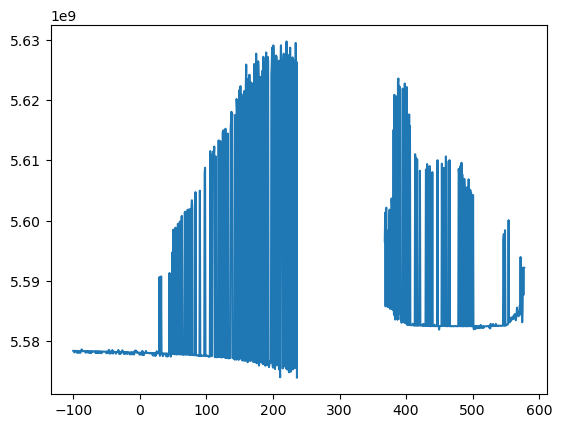

In [80]:
plt.plot(currents,lorentzfit)
plt.show()